In [113]:
import pandas as pd

In [114]:
# get products
df_train = pd.read_csv("../data/home_depot/train.csv", encoding="ISO-8859-1")
df_test = pd.read_csv("../data/home_depot/test.csv", encoding="ISO-8859-1")
df_train_test = pd.concat([df_train, df_test], axis=0).sort_values('product_id').reset_index(drop=True)

df_train.head()

,id,product_id,product_name,query,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [115]:
df_query = pd.DataFrame()
df_query['query'] = df_train['query'].unique()
df_query['query_id'] = df_query.index
df_query = df_query.reindex(columns=['query_id', 'query'])
df_query.to_csv('../data/home_depot/dataset/query.csv', index=False)

df_query

,query_id,query
0,0,angle bracket
1,1,l bracket
2,2,deck over
3,3,rain shower head
4,4,shower only faucet
...,...,...
11790,11790,pfj wm624 base 9/16
11791,11791,wiemans stainless cleaner
11792,11792,garden dishes
11793,11793,villager cast iron bath tubs


In [116]:
# get search queries
df_product = pd.read_csv("../data/home_depot/product_descriptions.csv")
df_product.head()

,product_id,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [117]:
df_product_with_title = pd.merge(df_train_test[['product_id', 'product_name']], df_product, on='product_id', how='outer')
df_product_with_title.drop_duplicates(subset=['product_id'], inplace=True)
df_product_with_title.reset_index(drop=True, inplace=True)
df_product_with_title.to_csv('../data/home_depot/dataset/product.csv', index=False)

df_product_with_title.head()

,product_id,product_name,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,Classic architecture meets contemporary design...
3,100004,Grape Solar 265-Watt Polycrystalline Solar Pan...,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,Update your bathroom with the Delta Vero Singl...


In [118]:
df_label = pd.merge(df_query[['query_id', 'query']], df_train[['product_id', 'query', 'relevance']], on=['query'], how='outer')
df_label.to_csv('../data/home_depot/dataset/label.csv', index=False)
df_label

,query_id,query,product_id,relevance
0,0,angle bracket,100001,3.00
1,0,angle bracket,100664,2.67
2,0,angle bracket,100672,2.33
3,0,angle bracket,100739,3.00
4,0,angle bracket,101036,1.33
...,...,...,...,...
74062,11790,pfj wm624 base 9/16,205624,2.33
74063,11791,wiemans stainless cleaner,205702,3.00
74064,11792,garden dishes,206092,2.67
74065,11793,villager cast iron bath tubs,206123,2.67


<Axes: >

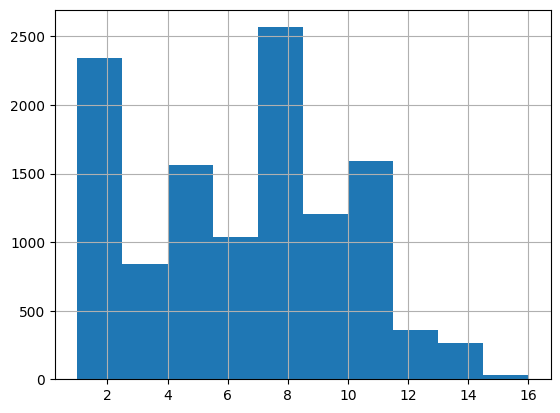

In [ ]:
df_query['search_term'].value_counts().hist()

In [15]:
df_query['search_term'].value_counts()

search_term
contact paoer                                  16
anderson windows 400 seriesimpact resistant    16
1/2 zip wall                                   16
metal sheet                                    16
3 WAY TOGGLE SWITCH                            16
                                               ..
peat pot                                        1
48 yard stake                                   1
hog wire                                        1
air nailers  for hardwood floor                 1
m6 screw 90mm                                   1
Name: count, Length: 11795, dtype: int64

In [16]:
df_query[df_query['search_term']=='contact paoer']

,id,product_uid,product_title,search_term,relevance
7012,21998,104176,Con-Tact 288 in. x 18 in. Beige Granite Drawer...,contact paoer,2.00
25796,79154,122997,Con-Tact 18 in. x 6 ft. Stainless Steel Multip...,contact paoer,1.67
33441,102280,132437,ClosetMaid 16 in. x 96 in. White Vinyl Shelf L...,contact paoer,1.67
39165,119549,140294,Sandusky 18 in. W x 0.25 in. H x 72 in. D Fros...,contact paoer,1.00
40298,122953,141966,ClosetMaid 12 in. x 120 in. White Vinyl Shelf ...,contact paoer,2.67
53532,162433,163273,Con-Tact Creative Covering 18 in. x 240 in. Be...,contact paoer,2.67
54069,164033,164252,Con-Tact 144 in. x 12 in. White Grip Liner,contact paoer,1.67
54729,165883,165411,Trinity 36 in. x 14 in. Shelf Liners (4-Pack),contact paoer,1.67
55261,167401,166347,Con-Tact Clear Covering 18 in. x 240 in. Clear...,contact paoer,2.33
56649,171404,168868,Liberty 18 in. x 117.6 in. Vintage Inspired Ad...,contact paoer,1.33


<Axes: >

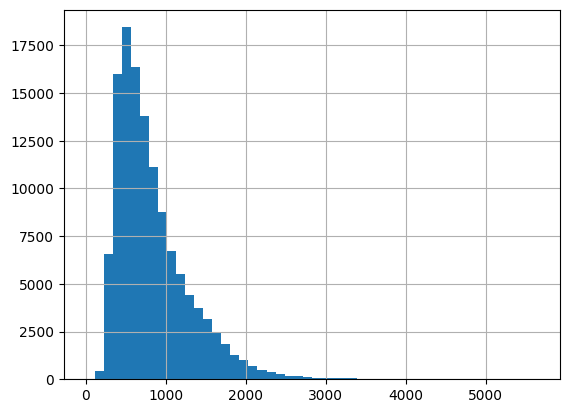

In [21]:
df_product['product_description'].map(len).hist(bins=50)